In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist

(training_data, training_labels), (testing_data, testing_labels) = mnist.load_data()

training_data = training_data / 255.0
testing_data = testing_data / 255.0

model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(
         128,
         activation = 'relu'
     ),
     tf.keras.layers.Dense(
         64,
         activation = 'relu'
     ),
     tf.keras.layers.Dense(
         32,
         activation = 'relu'
     ),
     tf.keras.layers.Dense(
         10,
         activation = 'softmax'
     )
    ]
)

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

my_model = model.fit(
    training_data,
    training_labels,
    epochs = 15
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6014 - loss: 1.2621
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9125 - loss: 0.3016
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9347 - loss: 0.2262
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9454 - loss: 0.1839
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9544 - loss: 0.1551
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9599 - loss: 0.1366
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9633 - loss: 0.1241
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9680 - loss: 0.1076
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9719 - loss: 0.0966
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9741 - loss: 0.0884
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9757 - loss: 0.0809
Epoch 12/15
1875/1875 ━━━━━━━━

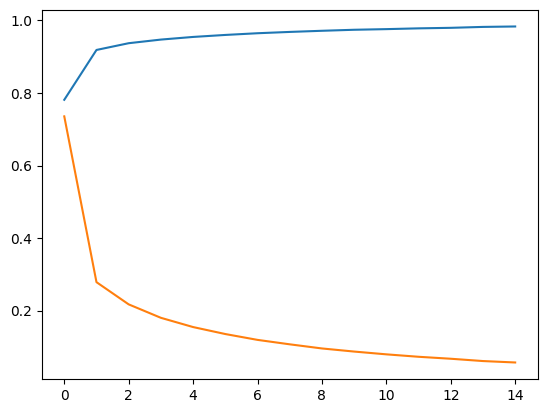

In [2]:
import matplotlib.pyplot as plt

accuracy = my_model.history['accuracy']
loss = my_model.history['loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy)
plt.plot(epochs, loss)
plt.show()

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (32, 784)                 │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (32, 128)                 │    100,480 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (32, 64)                  │      8,256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (32, 32)                  │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (32, 10)                  │        330 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 111,148 (434.18 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [4]:
model.evaluate(testing_data, testing_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9663 - loss: 0.1081


[0.092771016061306, 0.9710999727249146]

In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np

path = './Images_for_Testing/Three.png'
input_image = image.load_img(path, color_mode = 'grayscale', target_size = (28, 28))
numerical_values_of_image = image.img_to_array(input_image)
# expand_dimension = numerical_values_of_image.reshape(-1, 28, 28)
expand_dimension = np.expand_dims(numerical_values_of_image, axis = 0)
predicted_value = model.predict(expand_dimension)
argmax_predictions = np.argmax(predicted_value)
print(argmax_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3
